# Study note about behaviors of learning ARD weights

# Study: Correctness of ARD weightts

## objective

1. We confirm the computed ARD weights are as we expected.
2. We observe how the sigma value works on learninig the ARD weights.

## Settings

We generate the input data with the following way.

The input data has 3 dimensions. Only the 1st dimenstion has huge variance. The 2nd and 3rd features have the same mean and variance.

We cut the input data into 80 samples as `training` and 20 samples as `validation`.

In [47]:
size = 100
n_trial = 5
n_epoch = 500
batch_size = 200

result_stacks_with_sigma = []
result_stacks_without_sigma = []
for i_trial in range(0, n_trial):
    x_1st_dim = numpy.random.normal(loc=1.0, scale=0.0, size=size)
    y_1st_dim = numpy.random.normal(loc=1.0, scale=50.0, size=size)

    x_2_and_3_dim = numpy.random.normal(loc=10.0, scale=0.2, size=(size, 2))
    y_2_and_3_dim = numpy.random.normal(loc=10.0, scale=0.2, size=(size, 2))

    x = numpy.concatenate([numpy.reshape(x_1st_dim, (size, 1)), x_2_and_3_dim], axis=1)
    y = numpy.concatenate([numpy.reshape(y_1st_dim, (size, 1)), y_2_and_3_dim], axis=1)
    
    x_train = x[:80]
    y_train = y[:80]
    x_val = x[80:]
    y_val = y[80:]

    for n_dim in [0, 1, 2]:
        print(f'{n_dim+1} dim. mean(x)={x[:,n_dim].mean()} mean(y)={y[:,n_dim].mean()} var(x)={x[:,n_dim].var()} var(y)={y[:,n_dim].var()}')
    # end for
    
    # with sigma optimization
    trainer_theano = ModelTrainerTheanoBackend()
    trained_obj_theano = trainer_theano.train(x_train, y_train, num_epochs=n_epoch, batchsize=batch_size, opt_sigma=True, x_val=x_val, y_val=y_val, init_sigma_median=True)

    trainer_torch = ModelTrainerTorchBackend()
    trained_obj_torch = trainer_torch.train(x, y, num_epochs=n_epoch, batchsize=batch_size, opt_sigma=True, x_val=x_val, y_val=y_val, init_sigma_median=True)

    result_stacks_with_sigma.append([
                             (x, y),
                             (trained_obj_theano.scales, trained_obj_torch.scales),
                             (trained_obj_theano.sigma, trained_obj_torch.sigma)])
    # without sigma optimization
    trainer_theano = ModelTrainerTheanoBackend()
    trained_obj_theano = trainer_theano.train(x_train, y_train, num_epochs=n_epoch, batchsize=batch_size, opt_sigma=False, x_val=x_val, y_val=y_val, init_sigma_median=False, init_log_sigma=0.0)

    trainer_torch = ModelTrainerTorchBackend()
    trained_obj_torch = trainer_torch.train(x, y, num_epochs=n_epoch, batchsize=batch_size, opt_sigma=False, x_val=x_val, y_val=y_val, init_sigma_median=False, initial_log_sigma=0.0)

    result_stacks_without_sigma.append([
                             (x, y),
                             (trained_obj_theano.scales, trained_obj_torch.scales),
                             (trained_obj_theano.sigma, trained_obj_torch.sigma)])
# end for

Starting with sigma = median; optimizing it


1 dim. mean(x)=1.0 mean(y)=-4.384627802997895 var(x)=0.0 var(y)=2079.7359239912435
2 dim. mean(x)=10.002040839736596 mean(y)=9.993537358619573 var(x)=0.047708929474117256 var(y)=0.052386740691308616
3 dim. mean(x)=9.967910982314843 mean(y)=10.002795092729405 var(x)=0.03670755255391428 var(y)=0.04006707916793698


Compiling...
done
Getting median initial sigma value...
14.3
Input dim 3, representation dim 3
Training on 80 samples (batch 200), validation on 20 (batch 1000)
2 parameters to optimize: scales, log_sigma
     0: avg train MMD^2  0.540566 obj -2.170297,  avg val MMD^2  1.001788  obj -2.048367  elapsed: 0s  sigma: 14.3
     5: avg train MMD^2  0.593612 obj -2.248740,  avg val MMD^2  1.037566  obj -2.190055  elapsed: 0s  sigma: 12.9
    25: avg train MMD^2  0.877684 obj -2.742604,  avg val MMD^2  1.074363  obj -3.248652  elapsed: 0s  sigma: 6.24
    50: avg train MMD^2  0.937245 obj -3.217097,  avg val MMD^2  1.040621  obj -5.141930  elapsed: 0s  sigma: 2.45
   100: avg train MMD^2  1.013006 obj -8.078999,  avg val MMD^2  1.049995  obj -9.259126  elapsed: 0s  sigma: 0.153
   200: avg train MMD^2  1.012810 obj -8.107757,  avg val MMD^2  1.050000  obj -9.259131  elapsed: 0s  sigma: 0.0806
   300: avg train MMD^2  1.012806 obj -8.115964,  avg val MMD^2  1.050000  obj -9.259131  elapsed: 0s 

1 dim. mean(x)=1.0 mean(y)=6.233662309575279 var(x)=0.0 var(y)=2245.4647174681727
2 dim. mean(x)=10.013570123936258 mean(y)=9.995441247645575 var(x)=0.03037088725137238 var(y)=0.05797245728136552
3 dim. mean(x)=9.999611499272465 mean(y)=9.987867986438141 var(x)=0.043209372348355625 var(y)=0.045480172293101154


Compiling...
done
Getting median initial sigma value...
20.3
Input dim 3, representation dim 3
Training on 80 samples (batch 200), validation on 20 (batch 1000)
2 parameters to optimize: scales, log_sigma
     0: avg train MMD^2  0.567966 obj -2.129710,  avg val MMD^2  0.429956  obj -1.402593  elapsed: 0s  sigma: 20.3
     5: avg train MMD^2  0.614311 obj -2.198683,  avg val MMD^2  0.523443  obj -1.443853  elapsed: 0s  sigma: 18.6
    25: avg train MMD^2  0.917442 obj -2.911737,  avg val MMD^2  0.900508  obj -2.240701  elapsed: 0s  sigma: 7.87
    50: avg train MMD^2  0.982188 obj -3.637102,  avg val MMD^2  1.039422  obj -5.193796  elapsed: 0s  sigma: 2.35
   100: avg train MMD^2  0.970008 obj -3.695749,  avg val MMD^2  1.022332  obj -4.833642  elapsed: 0s  sigma: 1.48
   200: avg train MMD^2  0.971388 obj -3.725087,  avg val MMD^2  1.023432  obj -4.948908  elapsed: 0s  sigma: 1.12
   300: avg train MMD^2  0.121804 obj -2.535306,  avg val MMD^2  0.205258  obj -1.777287  elapsed: 0s  si

1 dim. mean(x)=1.0 mean(y)=-4.880698756906906 var(x)=0.0 var(y)=2400.1465340677437
2 dim. mean(x)=10.003438878701816 mean(y)=9.976702883704228 var(x)=0.045250867485479046 var(y)=0.031021925000447186
3 dim. mean(x)=10.00922047894336 mean(y)=9.998249511030743 var(x)=0.04114402678639256 var(y)=0.048398053482871274


done
Getting median initial sigma value...
21.7
Input dim 3, representation dim 3
Training on 80 samples (batch 200), validation on 20 (batch 1000)
2 parameters to optimize: scales, log_sigma
     0: avg train MMD^2  0.577534 obj -2.192347,  avg val MMD^2  0.694530  obj -1.895097  elapsed: 0s  sigma: 21.7
     5: avg train MMD^2  0.633739 obj -2.269785,  avg val MMD^2  0.806475  obj -2.042415  elapsed: 0s  sigma: 19.7
    25: avg train MMD^2  0.913009 obj -2.862648,  avg val MMD^2  1.073039  obj -3.446252  elapsed: 0s  sigma: 8.98
    50: avg train MMD^2  0.976102 obj -5.537151,  avg val MMD^2  1.012895  obj -4.734712  elapsed: 0s  sigma: 1.26
   100: avg train MMD^2  1.015751 obj -7.049892,  avg val MMD^2  1.050972  obj -7.036617  elapsed: 0s  sigma: 0.856
   200: avg train MMD^2  1.012500 obj -9.222763,  avg val MMD^2  1.050000  obj -9.259131  elapsed: 0s  sigma: 0.0352
   300: avg train MMD^2  1.012500 obj -9.222763,  avg val MMD^2  1.050000  obj -9.259131  elapsed: 0s  sigma: 0.034

1 dim. mean(x)=1.0 mean(y)=-5.684543306364003 var(x)=0.0 var(y)=2622.152082506811
2 dim. mean(x)=10.00586756205444 mean(y)=10.011463661041548 var(x)=0.04103345155183246 var(y)=0.041729904524923846
3 dim. mean(x)=9.989038631285482 mean(y)=9.984426795842396 var(x)=0.04502083061596651 var(y)=0.030487110430203503


done
Getting median initial sigma value...
16.5
Input dim 3, representation dim 3
Training on 80 samples (batch 200), validation on 20 (batch 1000)
2 parameters to optimize: scales, log_sigma
     0: avg train MMD^2  0.488815 obj -2.147238,  avg val MMD^2  0.581063  obj -1.567037  elapsed: 0s  sigma: 16.5
     5: avg train MMD^2  0.554671 obj -2.250644,  avg val MMD^2  0.660311  obj -1.737338  elapsed: 0s  sigma: 14.7
    25: avg train MMD^2  0.854377 obj -2.690373,  avg val MMD^2  0.969976  obj -2.329872  elapsed: 0s  sigma: 7.37
    50: avg train MMD^2  0.951005 obj -3.368138,  avg val MMD^2  0.983961  obj -2.879144  elapsed: 0s  sigma: 2.43
   100: avg train MMD^2  1.012707 obj -8.659397,  avg val MMD^2  1.049994  obj -9.259125  elapsed: 0s  sigma: 0.129
   200: avg train MMD^2  1.012500 obj -9.222763,  avg val MMD^2  1.050000  obj -9.259131  elapsed: 0s  sigma: 0.0391
   300: avg train MMD^2  1.012500 obj -9.222763,  avg val MMD^2  1.050000  obj -9.259131  elapsed: 0s  sigma: 0.039

1 dim. mean(x)=1.0 mean(y)=-3.345923902473982 var(x)=0.0 var(y)=2802.883209888031
2 dim. mean(x)=9.996983044475174 mean(y)=9.988511235338112 var(x)=0.03602150103604747 var(y)=0.036692734234289516
3 dim. mean(x)=9.984610788067254 mean(y)=10.025084127742387 var(x)=0.0462623589259984 var(y)=0.03179950231873662


done
Getting median initial sigma value...
23.2
Input dim 3, representation dim 3
Training on 80 samples (batch 200), validation on 20 (batch 1000)
2 parameters to optimize: scales, log_sigma
     0: avg train MMD^2  0.554177 obj -2.106629,  avg val MMD^2  0.399398  obj -1.186496  elapsed: 0s  sigma: 23.2
     5: avg train MMD^2  0.593716 obj -2.165136,  avg val MMD^2  0.446221  obj -1.260273  elapsed: 0s  sigma: 21.3
    25: avg train MMD^2  0.942477 obj -3.098021,  avg val MMD^2  0.890943  obj -2.209552  elapsed: 0s  sigma: 8.17
    50: avg train MMD^2  0.989475 obj -5.593954,  avg val MMD^2  1.016800  obj -4.921984  elapsed: 0s  sigma: 1.34
   100: avg train MMD^2  1.012975 obj -8.018861,  avg val MMD^2  1.049989  obj -9.259120  elapsed: 0s  sigma: 0.191
   200: avg train MMD^2  0.025012 obj -5.521939,  avg val MMD^2  0.100000  obj -6.907755  elapsed: 0s  sigma: 0.0058
   300: avg train MMD^2  0.025000 obj -5.521477,  avg val MMD^2  0.100000  obj -6.907755  elapsed: 0s  sigma: 0.004

### Observations

(0.0, 15.0)

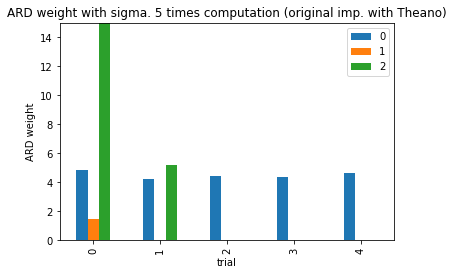

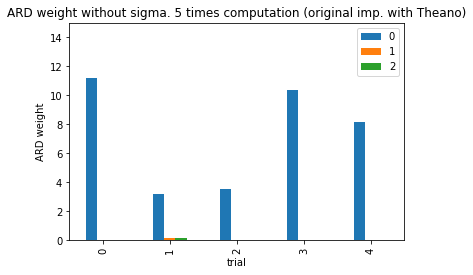

In [48]:
# Theano imp.
__df_with_sigma = []
__df_without_sigma = []
for trial_with_sigma, trial_without_sigma in zip(result_stacks_with_sigma, result_stacks_without_sigma):
    __df_with_sigma.append(trial_with_sigma[1][0])
    __df_without_sigma.append(trial_without_sigma[1][0])
# end for
df_with_sigma = pandas.DataFrame(__df_with_sigma, index = list(range(0, n_trial)))
ax = df_with_sigma.plot(kind='bar')
plt.title(f"ARD weight with sigma. {n_trial} times computation (original imp. with Theano)")
plt.ylabel("ARD weight")
plt.xlabel("trial")
ax.set_ylim(0, 15)
# plot without sigma
df_without_sigma = pandas.DataFrame(__df_without_sigma, index = list(range(0, n_trial)))
ax = df_without_sigma.plot(kind='bar')
plt.title(f"ARD weight without sigma. {n_trial} times computation (original imp. with Theano)")
plt.ylabel("ARD weight")
plt.xlabel("trial")
ax.set_ylim(0, 15)

(0.0, 15.0)

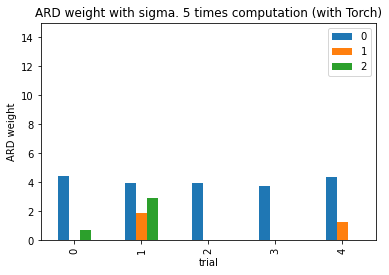

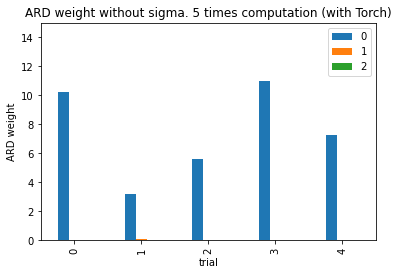

In [49]:
# Theano imp.
__df_with_sigma = []
__df_without_sigma = []
for trial_with_sigma, trial_without_sigma in zip(result_stacks_with_sigma, result_stacks_without_sigma):
    __df_with_sigma.append(trial_with_sigma[1][1])
    __df_without_sigma.append(trial_without_sigma[1][1])
# end for
df_with_sigma = pandas.DataFrame(__df_with_sigma, index = list(range(0, n_trial)))
ax = df_with_sigma.plot(kind='bar')
plt.title(f"ARD weight with sigma. {n_trial} times computation (with Torch)")
plt.ylabel("ARD weight")
plt.xlabel("trial")
ax.set_ylim(0, 15)
# plot without sigma
df_without_sigma = pandas.DataFrame(__df_without_sigma, index = list(range(0, n_trial)))
ax = df_without_sigma.plot(kind='bar')
plt.title(f"ARD weight without sigma. {n_trial} times computation (with Torch)")
plt.ylabel("ARD weight")
plt.xlabel("trial")
ax.set_ylim(0, 15)

### conclusion

The computed ARD weight will not be as we expected __if__ we optimize sigma value at the same time.

Then, we should tune __only scales (ARD weight)__ if we want to obtain the ARD weight.

In [ ]:
%reset

# Study: stability of ARD weights

## Objective

To confirm the computed ARD weighted will be similar.

In the exp, we have the following conditions,

- the training data x and y are fixed.
- the validation data x and y are fixed.
- sigma will not be tuned

In [19]:
from model_criticism_mmd import ModelTrainerTheanoBackend, ModelTrainerTorchBackend

In [20]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas
import numpy

In [24]:
size = 100
x_1st_dim = numpy.random.normal(loc=1.0, scale=0.0, size=size)
y_1st_dim = numpy.random.normal(loc=1.0, scale=50.0, size=size)

x_2_and_3_dim = numpy.random.normal(loc=10.0, scale=0.2, size=(size, 2))
y_2_and_3_dim = numpy.random.normal(loc=10.0, scale=0.2, size=(size, 2))

x = numpy.concatenate([numpy.reshape(x_1st_dim, (size, 1)), x_2_and_3_dim], axis=1)
y = numpy.concatenate([numpy.reshape(y_1st_dim, (size, 1)), y_2_and_3_dim], axis=1)

x_train = x[:80]
y_train = y[:80]
x_val = x[80:]
y_val = y[80:]

for n_dim in [0, 1, 2]:
    print(f'{n_dim+1} dim. mean(x)={x[:,n_dim].mean()} mean(y)={y[:,n_dim].mean()} var(x)={x[:,n_dim].var()} var(y)={y[:,n_dim].var()}')
# end for

1 dim. mean(x)=1.0 mean(y)=5.88268324033833 var(x)=0.0 var(y)=2581.977256325252
2 dim. mean(x)=9.973029705725683 mean(y)=10.00802135093335 var(x)=0.028781844253832095 var(y)=0.029758249712898838
3 dim. mean(x)=9.99467942716704 mean(y)=9.988748332579542 var(x)=0.04884625612449244 var(y)=0.03747702442607639


In [33]:
result_stacks = []
n_trial = 5
n_epoch = 500
batch_size = 200
is_opt_sigma = False
for i_trial in range(0, n_trial):
    trainer_theano = ModelTrainerTheanoBackend()
    trained_obj_theano = trainer_theano.train(x_train, y_train, num_epochs=n_epoch, batchsize=batch_size, opt_sigma=is_opt_sigma, x_val=x_val, y_val=y_val, init_sigma_median=False, init_log_sigma=0.0)

    trainer_torch = ModelTrainerTorchBackend()
    trained_obj_torch = trainer_torch.train(x_train, y_train, num_epochs=n_epoch, batchsize=batch_size, opt_sigma=is_opt_sigma, x_val=x_val, y_val=y_val, init_sigma_median=False, initial_log_sigma=0.0)

    result_stacks.append([
                             (trained_obj_theano.scales, trained_obj_torch.scales),
                             (trained_obj_theano.sigma, trained_obj_torch.sigma)
    ])
# end for

Using sigma = 1.0
Compiling...
done
Input dim 3, representation dim 3
Training on 80 samples (batch 200), validation on 20 (batch 1000)
1 parameters to optimize: scales
     0: avg train MMD^2  0.917062 obj -3.513093,  avg val MMD^2  0.979452  obj -4.135997  elapsed: 0s
     5: avg train MMD^2  0.918635 obj -3.522559,  avg val MMD^2  0.981574  obj -4.164211  elapsed: 0s
    25: avg train MMD^2  0.935704 obj -3.607468,  avg val MMD^2  0.995426  obj -4.317761  elapsed: 0s
    50: avg train MMD^2  0.953215 obj -3.655343,  avg val MMD^2  1.009365  obj -4.516548  elapsed: 0s
   100: avg train MMD^2  0.969621 obj -3.678606,  avg val MMD^2  1.025668  obj -4.860636  elapsed: 0s
   200: avg train MMD^2  0.981672 obj -3.690579,  avg val MMD^2  1.039932  obj -5.295575  elapsed: 0s
   300: avg train MMD^2  0.986502 obj -3.695111,  avg val MMD^2  1.046056  obj -5.502430  elapsed: 0s
   400: avg train MMD^2  0.988921 obj -3.697733,  avg val MMD^2  1.049175  obj -5.597300  elapsed: 0s
   500: avg tra

We show the ARD weights in 5 times computations. 3 bars represent the ARD weights for each feature.

(0.0, 4.0)

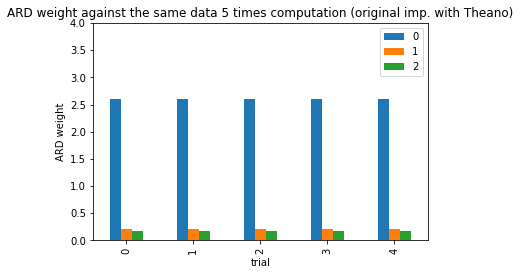

In [36]:
__df_theano_result = []
for i_trial, trial_result in enumerate(result_stacks):
    __df_theano_result.append(trial_result[0][0])
# end for
df_theano_result = pandas.DataFrame(__df_theano_result, index = list(range(0, n_trial)))
ax = df_theano_result.plot(kind='bar')
plt.title(f"ARD weight against the same data {n_trial} times computation (original imp. with Theano)")
plt.ylabel("ARD weight")
plt.xlabel("trial")
ax.set_ylim(0, 4)

(0.0, 4.0)

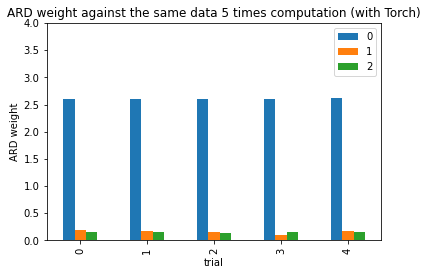

In [37]:
__df_torch_result = []
for i_trial, trial_result in enumerate(result_stacks):
    __df_torch_result.append(trial_result[0][1])
# end for
df_torch_result = pandas.DataFrame(__df_torch_result, index = list(range(0, n_trial)))
ax = df_torch_result.plot(kind='bar')
plt.title(f"ARD weight against the same data {n_trial} times computation (with Torch)")
plt.ylabel("ARD weight")
plt.xlabel("trial")
ax.set_ylim(0, 4)

### concolusion

With the above observation, we confirm that the ARD weight will __converage__ if we fix the input data and the sigma.

In [18]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


# Study: with/without sigma optimizations

In [1]:
from model_criticism_mmd import ModelTrainerTheanoBackend, ModelTrainerTorchBackend

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


In [2]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas
import numpy

In [3]:
size = 200
x = numpy.random.normal(loc=1.0, scale=0.0, size=(200, 3))
y = numpy.random.normal(loc=1.0, scale=50.0, size=(200, 3))

#x_2_and_3_dim = numpy.random.normal(loc=10.0, scale=0.2, size=(size, 2))
#y_2_and_3_dim = numpy.random.normal(loc=10.0, scale=0.2, size=(size, 2))

#x = numpy.concatenate([numpy.reshape(x_1st_dim, (size, 1)), x_2_and_3_dim], axis=1)
#y = numpy.concatenate([numpy.reshape(y_1st_dim, (size, 1)), y_2_and_3_dim], axis=1)

x_train = x[:100]
y_train = y[:100]
x_val = x[100:150]
y_val = y[100:150]
x_test = x[150:]
y_test = y[150:]

for n_dim in [0, 1, 2]:
    print(f'{n_dim+1} dim. mean(x)={x[:,n_dim].mean()} mean(y)={y[:,n_dim].mean()} var(x)={x[:,n_dim].var()} var(y)={y[:,n_dim].var()}')
# end for
assert len(x_train) == len(y_train) == 100
assert len(x_val) == len(y_val) == 50
assert len(x_test) == len(y_test) == 50

1 dim. mean(x)=1.0 mean(y)=-6.134923650595601 var(x)=0.0 var(y)=2483.728508442119
2 dim. mean(x)=1.0 mean(y)=2.7210920981855673 var(x)=0.0 var(y)=2754.3351727739832
3 dim. mean(x)=1.0 mean(y)=-0.9651828059532181 var(x)=0.0 var(y)=2459.4318239408385


In [8]:
n_epoch = 500
batch_size = 200
is_opt_sigma = False
# with sigma optimizations
trainer_theano = ModelTrainerTheanoBackend()
trained_obj_theano_without_sigma = trainer_theano.train(x_train, y_train, num_epochs=n_epoch, batchsize=batch_size, opt_sigma=is_opt_sigma, x_val=x_val, y_val=y_val, init_sigma_median=False, init_log_sigma=0.0)

trainer_torch = ModelTrainerTorchBackend()
trained_obj_torch_without_sigma = trainer_torch.train(x_train, y_train, num_epochs=n_epoch, batchsize=batch_size, opt_sigma=is_opt_sigma, x_val=x_val, y_val=y_val, init_sigma_median=False, initial_log_sigma=0.0)

mmd2_theano, ratio_theano = trainer_theano.mmd_distance(x=x_test, y=y_test, sigma=trained_obj_theano_without_sigma.sigma)
mmd2_torch, ratio_torch = trainer_torch.mmd_distance(x=x_test, y=y_test)
print(f'MMD without the sigma optimization. Theano: {mmd2_theano} Torch: {mmd2_torch}')

Using sigma = 1.0
Compiling...
done
Input dim 3, representation dim 3
Training on 100 samples (batch 200), validation on 50 (batch 1000)
1 parameters to optimize: scales
     0: avg train MMD^2  1.010000 obj -9.220291,  avg val MMD^2  1.020000  obj -9.230143  elapsed: 0s
     5: avg train MMD^2  1.010000 obj -9.220291,  avg val MMD^2  1.020000  obj -9.230143  elapsed: 0s
    25: avg train MMD^2  1.010000 obj -9.220291,  avg val MMD^2  1.020000  obj -9.230143  elapsed: 0s
    50: avg train MMD^2  1.010000 obj -9.220291,  avg val MMD^2  1.020000  obj -9.230143  elapsed: 0s
   100: avg train MMD^2  1.010000 obj -9.220291,  avg val MMD^2  1.020000  obj -9.230143  elapsed: 0s
   200: avg train MMD^2  1.010000 obj -9.220291,  avg val MMD^2  1.020000  obj -9.230143  elapsed: 0s
   300: avg train MMD^2  1.010000 obj -9.220291,  avg val MMD^2  1.020000  obj -9.230143  elapsed: 0s
   400: avg train MMD^2  1.010000 obj -9.220291,  avg val MMD^2  1.020000  obj -9.230143  elapsed: 0s
   500: avg tr

MMD without the sigma optimization. Theano: 1.02 Torch: 1.0199999999998544


In [9]:
n_epoch = 500
batch_size = 200
is_opt_sigma = True
# with sigma optimizations
trainer_theano = ModelTrainerTheanoBackend()
trained_obj_theano_with_sigma = trainer_theano.train(x_train, y_train, num_epochs=n_epoch, batchsize=batch_size, opt_sigma=is_opt_sigma, x_val=x_val, y_val=y_val, init_sigma_median=True)

trainer_torch = ModelTrainerTorchBackend()
trained_obj_torch_with_sigma = trainer_torch.train(x_train, y_train, num_epochs=n_epoch, batchsize=batch_size, opt_sigma=is_opt_sigma, x_val=x_val, y_val=y_val, init_sigma_median=True)

mmd2_theano_with_sigma, ratio_theano = trainer_theano.mmd_distance(x=x_val, y=y_val, sigma=trained_obj_theano_with_sigma.sigma)
mmd2_torch_with_sigma, ratio_torch = trainer_torch.mmd_distance(x=x_val, y=y_val)
print(f'MMD with the sigma optimization. Theano: {mmd2_theano_with_sigma} Torch: {mmd2_torch_with_sigma}')

Starting with sigma = median; optimizing it
Compiling...
done
Getting median initial sigma value...
61.6
Input dim 3, representation dim 3
Training on 100 samples (batch 200), validation on 50 (batch 1000)
2 parameters to optimize: scales, log_sigma
     0: avg train MMD^2  0.368900 obj -2.518141,  avg val MMD^2  0.329709  obj -2.069224  elapsed: 0s  sigma: 61.6
     5: avg train MMD^2  0.446184 obj -2.597464,  avg val MMD^2  0.425548  obj -2.172005  elapsed: 0s  sigma: 54.7
    25: avg train MMD^2  1.010300 obj -9.157834,  avg val MMD^2  1.019869  obj -7.540090  elapsed: 0s  sigma: 6.95
    50: avg train MMD^2  1.010000 obj -9.220291,  avg val MMD^2  1.020000  obj -9.230143  elapsed: 0s  sigma: 1.3
   100: avg train MMD^2  1.010000 obj -9.220291,  avg val MMD^2  1.020000  obj -9.230143  elapsed: 0s  sigma: 1.14
   200: avg train MMD^2  1.010000 obj -9.220291,  avg val MMD^2  1.020000  obj -9.230143  elapsed: 0s  sigma: 1.14
   300: avg train MMD^2  1.010000 obj -9.220291,  avg val MMD

MMD with the sigma optimization. Theano: 1.02 Torch: 1.02


### Conclusion

Sigma optimization does not seem to give effects to compute MMD^2 distance.